In [53]:
from scipy.signal import filtfilt
from scipy import stats
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from src.format_csv import csv_format
import scipy
import seaborn as sns

# Set up plot specifications
sns.set(style='ticks')
sns.axes_style('white')
sns.set_context("paper", font_scale=1.25, rc={"lines.linewidth": 2})
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 12})


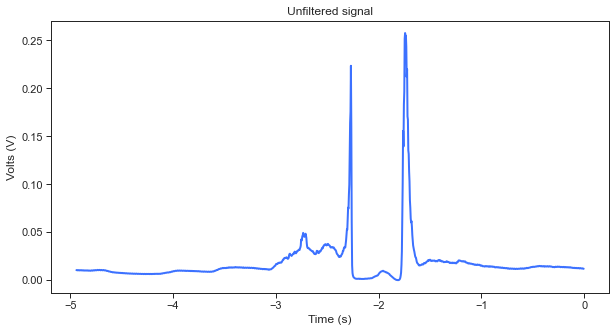

In [54]:
# Choose which CSV file to graph
scope_num = 1
lab_num = 2
filename = f'data/Lab_{lab_num}/Raw/scope_{scope_num}.csv'
csv_format(filename) # Format CSV to prepare for plotting

df = pd.read_csv(filename)
sensor_data = df[['channel_2']]
sensor_data = np.array(sensor_data)
time = np.array(df['x_axis'])

# Plot the original signal
plt.plot(time, sensor_data, color = '#3C71FF')
plt.xlabel('Time (s)')
plt.ylabel('Volts (V)')
plt.title('Unfiltered signal')
plt.show()

In [55]:

# Function to apply the bandpass filter
def band_pass_filter(signal):

    # Sampling Rate of data
    fs = len(signal) / 5

    # Range for filter
    lowcut = 0.01 # Tends to control how 'flat' the ends are
    highcut = 5 # Tends to control how much the graph resembles the original graph (higher = closer to original)

    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq

    order=2

    b,a = scipy.signal.butter(order,[low,high], 'bandpass', analog=False)
    y = scipy.signal.filtfilt(b,a,signal,axis=0)

    return y

<ipython-input-56-ed15e2051376>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(time, sensor_data, color='#07DCCB', LineWidth=2, label="Unfiltered Signal")
<ipython-input-56-ed15e2051376>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(time, filtered_signal, color='#000000', LineWidth=2, label="Filtered Signal")


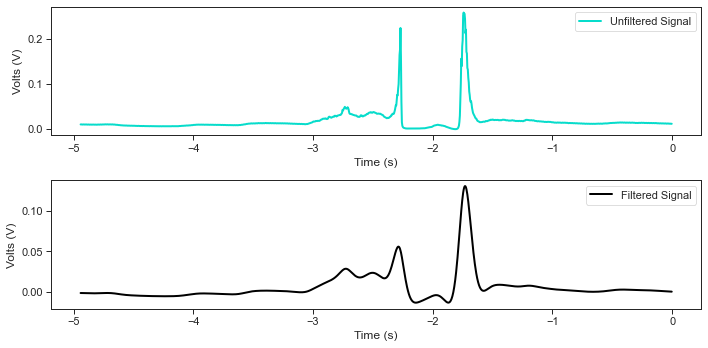

In [56]:

fig,axs = plt.subplots(2,1)

# Plotting the original signal
plt.sca(axs[0])
plt.plot(time, sensor_data, color='#07DCCB', LineWidth=2, label="Unfiltered Signal")
plt.xlabel('Time (s)')
plt.ylabel('Volts (V)')
plt.legend()

# Plotting the filtered signal
plt.sca(axs[1])
filtered_signal = band_pass_filter(sensor_data)
plt.plot(time, filtered_signal, color='#000000', LineWidth=2, label="Filtered Signal")
plt.xlabel('Time (s)')
plt.ylabel('Volts (V)')
plt.legend()

plt.tight_layout()

# save raw scope as png in data/Plots/Lab_<lab_num>/Spectrograms
image_path = f'data/Plots/Lab_{lab_num}/Bandpass_filtered_plots/scope_{scope_num}.png'
plt.savefig(image_path, dpi=300, bbox_inches='tight', transparent=False)

In [57]:
# Save Bandpass Filtered data as a new CSV
t=time.tolist()
f =filtered_signal.tolist()
f=sum(f,[])
df = pd.DataFrame(list(zip(*[t,f])))
df.columns=['x_axis', 'channel_2']
df.to_csv(f'data/Lab_{lab_num}/Filtered/scope_{scope_num}.csv', index=False)

